## Giá chứng khoán của công ty Apple (AAPL) từ Yahoo Finance

## Khảo sát dữ liệu:
- Xử lý dữ liệu
- Min, Max, Mean, Standard deviation, Modes, Percentiles 
- Số hàng và cột của dữ liệu
- Tên các cột của dữ liệu

In [3]:
# Tính min/ max, median, variance, standard deviation cho mỗi cột: Open, Close, High, Low, Volume

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu giá chứng khoán từ Yahoo Finance
start_date = "2023-01-01"
end_date = "2023-09-30"
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Kiểm tra và xử lý dữ liệu rỗng
missing_data = stock_data.isnull().sum()
if missing_data.any():
    print("\nDữ liệu rỗng (missing data):")
    print(missing_data)
# Xóa các dữ liệu rỗng
stock_data.dropna()
# check duplicate
stock_data[stock_data.duplicated()]
# check missing data
print('Kiểm tra rỗng')
stock_data.isna().sum()

[*********************100%%**********************]  1 of 1 completed
Kiểm tra rỗng


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## KHẢO SÁT DỮ LIỆU

In [4]:
# Thực hiện phân tích dữ liệu cơ bản
print(stock_data.describe())

             Open        High         Low       Close   Adj Close  \
count  187.000000  187.000000  187.000000  187.000000  187.000000   
mean   168.237969  169.876952  166.916150  168.475401  167.939220   
std     17.809831   17.569151   17.787287   17.568222   17.677118   
min    126.010002  127.769997  124.169998  125.019997  124.325073   
25%    153.629997  155.900002  151.735001  154.175003  153.434830   
50%    172.479996  173.539993  171.470001  172.070007  171.733749   
75%    180.949997  182.004997  178.440002  180.760002  180.278725   
max    196.240005  198.229996  195.279999  196.449997  195.926956   

             Volume  
count  1.870000e+02  
mean   6.133250e+07  
std    1.829274e+07  
min    3.145820e+07  
25%    4.912860e+07  
50%    5.629440e+07  
75%    6.772255e+07  
max    1.543573e+08  


In [5]:
print(stock_data.shape)           # 187 hàng dữ liệu, 6 cột dữ liệu

(187, 6)


In [6]:
# Trả về một Index object chứa tên của các cột
print(stock_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# Convert dữ liệu về dạng pandas và kiểm tra 5 hàng đầu tiên
import pandas as pd

df = pd.DataFrame(stock_data)
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325073   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899506   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426575   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


## KIỂM TRA ĐỘ TƯƠNG QUAN BẰNG HEATMAP

[*********************100%%**********************]  1 of 1 completed
           Open      High       Low     Close
Open   1.000000  0.997523  0.997704  0.994406
High   0.997523  1.000000  0.997713  0.997444
Low    0.997704  0.997713  1.000000  0.998003
Close  0.994406  0.997444  0.998003  1.000000


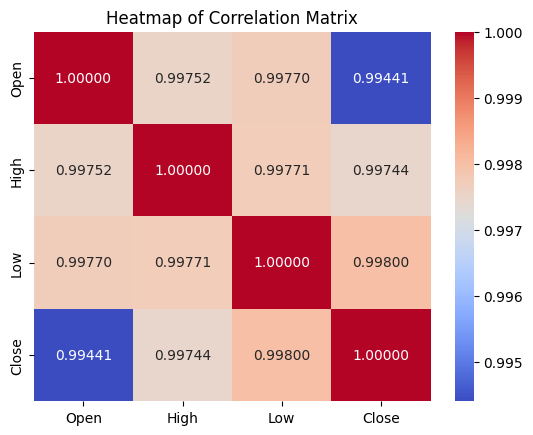

In [9]:
# Tính độ tương quan giữa các cột: Open, Close, High, Low, Volume và trực quan bằng vẽ đồ thị và heatmap

# Heatmap

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu giá chứng khoán từ Yahoo Finance
start_date = "2023-01-01"
end_date = "2023-09-30"
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Tính độ tương quan giữa các cột
correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close']].corr()
print(correlation_matrix)

# Trực quan hóa đồ thị bằng heat map
sns.heatmap(correlation_matrix, fmt=".5f", annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

## BIỂU ĐỒ MỐI QUAN HỆ GIỮA CÁC THUỘC TÍNH `OPEN`, `HIGH`, `LOW` ĐẾN GIÁ `CLOSE`

[*********************100%%**********************]  1 of 1 completed


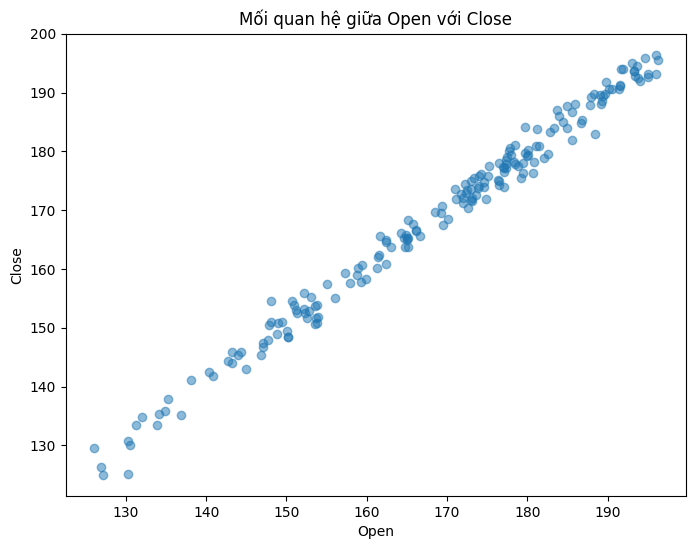

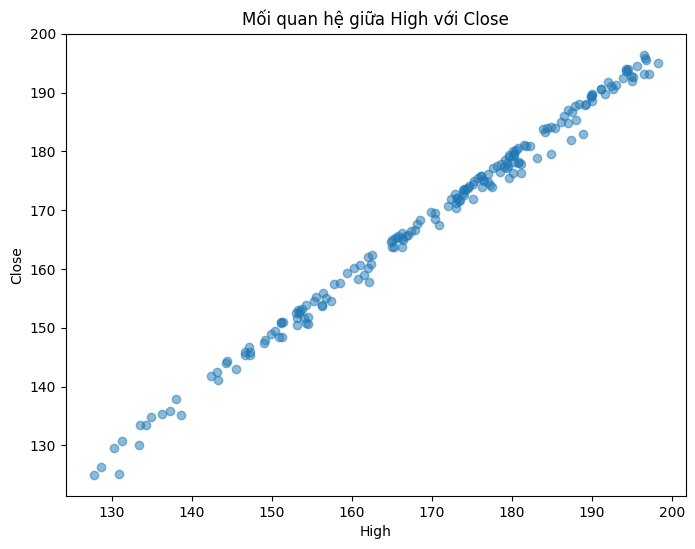

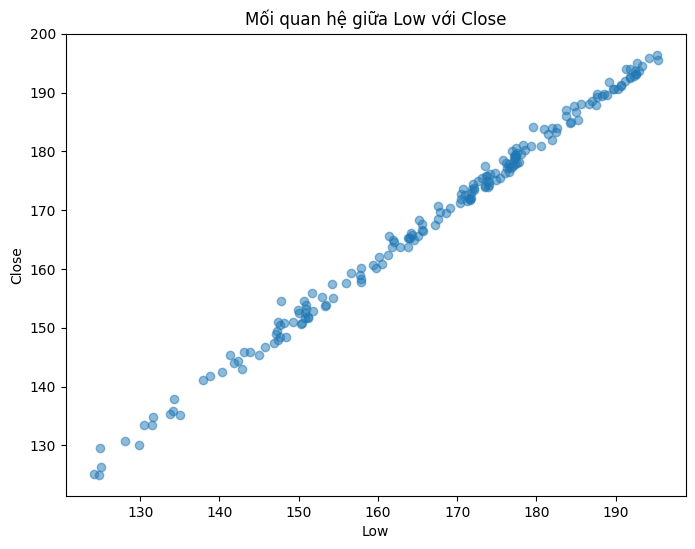

In [16]:
# Biểu đồ scatter

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu giá chứng khoán từ Yahoo Finance
start_date = "2023-01-01"
end_date = "2023-09-30"
stock_data = yf.download("AAPL", start=start_date, end=end_date)

feature_cols = ['Open', 'High', 'Low']

# Lặp qua từng cột trong feature_cols để vẽ biểu đồ đường
for feature in feature_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(stock_data[feature], stock_data['Close'], alpha=0.5)
    plt.xlabel(f'{feature}')
    plt.ylabel('Close')
    plt.title(f'Mối quan hệ giữa {feature} với Close')
    plt.show()

## XÂY DỰNG MÔ HÌNH DỰ ĐOÁN
- TH1: PHÂN TÍCH ĐA BIẾN BẰNG LINEAR REGRESSION
- TH2: PHÂN TÍCH ĐƠN BIẾN BẰNG LINEAR REGRESSION
- SO SÁNH TH1 VÀ TH2
## CHIA TRAIN DATA VÀ TEST DATA
- Training model: 1/1/2023 - 30/9/2023
- Test model: 1/10/2023 - 31/10/2023

## TH1: PHÂN TÍCH ĐA BIẾN

[*********************100%%**********************]  1 of 1 completed
R^2 score: 0.9654804628647456
MAE: 0.5707468426797215
MSE: 0.48195870146430275


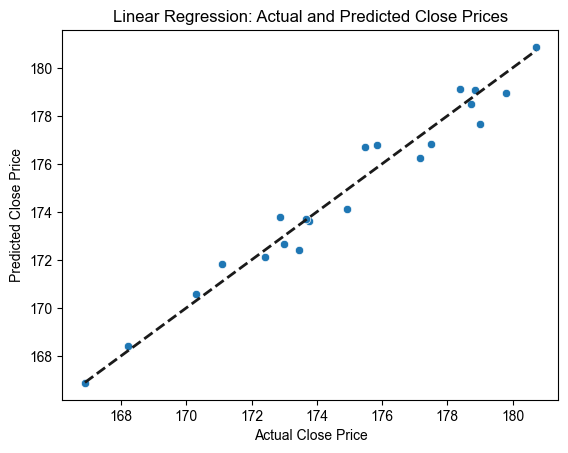

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf                   # Lấy dữ liệu giá chứng khoán từ Yahoo Finance

# Bước 1: Chuẩn bị dữ liệu, tập train và tập test
start_date = "2023-01-01"
end_date = "2023-10-31"  
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Kiểm tra và xoá những dòng thiếu giá trị ở một cột bất kì (nếu có)
stock_data.isnull().sum()
data = stock_data.dropna()

""" 
Training model: 1/1/2023 - 30/9/2023
Test model: 1/10/2023 - 31/10/2023
"""

# Lọc dữ liệu theo khoảng thời gian cho training model và test model
train_data = stock_data.loc["2023-01-01":"2023-09-30"]
test_data = stock_data.loc["2023-10-01":"2023-10-31"]

feature_cols = ['Open', 'High', 'Low']

# Bước 2: Chia tập dữ liệu
X_train = train_data[feature_cols]
y_train = train_data['Close']
X_test = test_data[feature_cols]
y_test = test_data['Close']

# Bước 3: Tiền xử lí dữ liệu với PolynomialFeatures và xây dựng mô hình hồi quy
polynomial = PolynomialFeatures(degree=3)  # Sử dụng đa thức bậc 3
X_train = polynomial.fit_transform(X_train)
X_test = polynomial.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 5: Tính độ chính xác của mô hình bằng các cách metrics khác nhau
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MAE:", mae)
print('MSE:', mse)

# Bước 6: Vẽ đồ thị
sns.scatterplot(x=y_test, y=y_pred)
sns.set(style="whitegrid")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression: Actual and Predicted Close Prices")

# Vẽ đường thẳng y = x để so sánh với dữ liệu thực tế và dự đoán
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='k', linewidth=2)
plt.show()

## THỬ 1 TEST CASE VỚI MÔ HÌNH ĐÃ TRAIN Ở BÊN TRÊN

In [18]:
import yfinance as yf
import pandas as pd

# Lấy dữ liệu giá chứng khoán từ Yahoo Finance
start_date = "2023-11-01"
end_date = "2023-11-03"
stock_data = yf.download("AAPL", start=start_date, end=end_date)

df = pd.DataFrame(stock_data)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-01  171.000000  174.229996  170.119995  173.970001  173.741104   
2023-11-02  175.520004  177.779999  175.460007  177.570007  177.336380   

              Volume  
Date                  
2023-11-01  56934900  
2023-11-02  77334800  


In [19]:
import pandas as pd

# Ví dụ về dữ liệu cho test case mới
new_data = {'Open': [171], 'High': [174.229996], 'Low': [170.119995]}
new_data_df = pd.DataFrame(new_data)

# Tiền xử lý dữ liệu với PolynomialFeatures cho test case mới
new_data = polynomial.transform(new_data_df)

# Dự đoán giá Close của test case mới
new_close_price = model.predict(new_data)
print("Predicted Close Price for the New Test Case:", new_close_price)


Predicted Close Price for the New Test Case: [172.96172398]


## PHÂN TÍCH ĐƠN BIẾN

[*********************100%%**********************]  1 of 1 completed
R^2 score: 0.9142632344649859
MAE: 0.8561367642564565
MSE: 1.1970490804409888


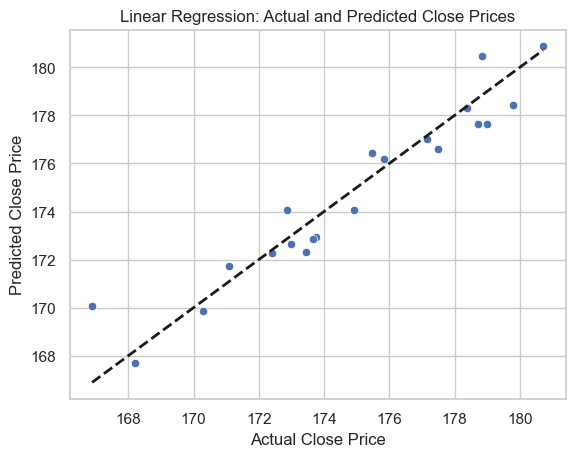

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf                   # Lấy dữ liệu giá chứng khoán từ Yahoo Finance

# Bước 1: Chuẩn bị dữ liệu, tập train và tập test
start_date = "2023-01-01"
end_date = "2023-10-31"  
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Kiểm tra và xoá những dòng thiếu giá trị ở một cột bất kì (nếu có)
stock_data.isnull().sum()
data = stock_data.dropna()

""" 
Training model: 1/1/2023 - 30/9/2023
Test model: 1/10/2023 - 31/10/2023
"""

# Lọc dữ liệu theo khoảng thời gian cho training model và test model
train_data = stock_data.loc["2023-01-01":"2023-09-30"]
test_data = stock_data.loc["2023-10-01":"2023-10-31"]

feature_cols = ['High']

# Bước 2: Chia tập dữ liệu
X_train = train_data[feature_cols]
y_train = train_data['Close']
X_test = test_data[feature_cols]
y_test = test_data['Close']

# Bước 3: Tiền xử lí dữ liệu với PolynomialFeatures và xây dựng mô hình hồi quy
polynomial = PolynomialFeatures(degree=3)  # Sử dụng đa thức bậc 3
X_train = polynomial.fit_transform(X_train)
X_test = polynomial.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 5: Tính độ chính xác của mô hình bằng các metrics khác nhau
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("MAE:", mae)
print('MSE:', mse)

# Bước 6: Vẽ đồ thị
sns.scatterplot(x=y_test, y=y_pred)
sns.set(style="whitegrid")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Linear Regression: Actual and Predicted Close Prices")

# Vẽ đường thẳng y = x để so sánh với dữ liệu thực tế và dự đoán
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='k', linewidth=2)
plt.show()

## So sánh TH1 và TH2 với cùng một model `Linear Regression`

* TH1: PHÂN TÍCH `ĐA BIẾN` BẰNG LINEAR REGRESSION
* TH2: PHÂN TÍCH `ĐƠN BIẾN` BẰNG LINEAR REGRESSION

TH1:
- Đặc Trưng Sử Dụng: Các cột `'Open'`, `'High'`, và `'Low'` được sử dụng làm đặc trưng.
- Đặc Trưng Đa Thức: Áp dụng đặc trưng đa thức bậc 3.

TH2:
- Đặc Trưng Sử Dụng: Chỉ có cột `'High'` được sử dụng làm đặc trưng.
- Đặc Trưng Đa Thức: Áp dụng đặc trưng đa thức bậc 3.

KẾT LUẬN:
- `TH1` tích hợp nhiều đặc trưng ('Open', 'High', 'Low'), nắm bắt được một phạm vi thông tin rộng hơn và thực tế là đưa ra một mô hình với độ chính xác cao hơn `TH2` (đo thông qua 3 metrics `MAE, MSE, R^2`)



[*********************100%%**********************]  1 of 1 completed


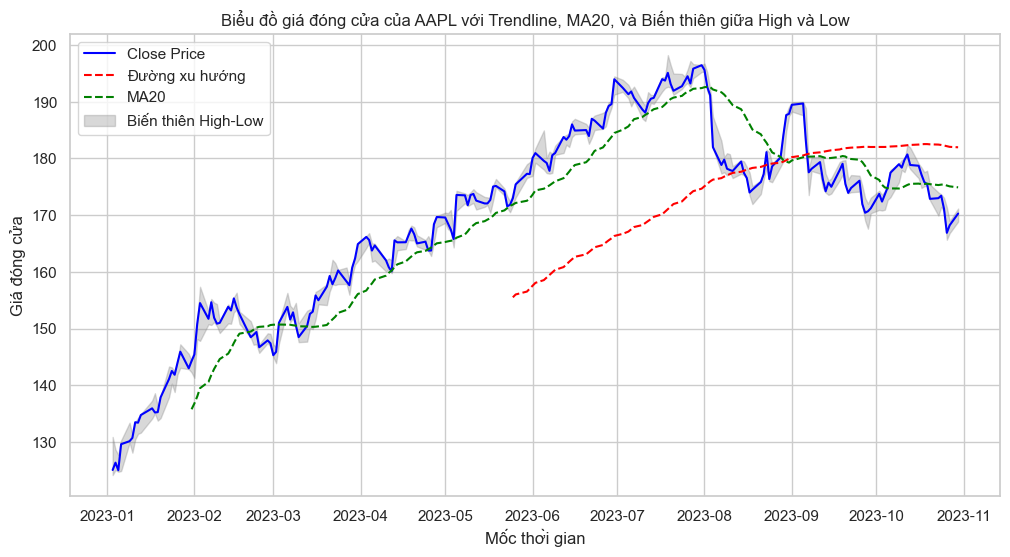

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Bước 1: Chuẩn bị dữ liệu
start_date = "2023-01-01"
end_date = "2023-10-31"  
stock_data = yf.download("AAPL", start=start_date, end=end_date)

# Bước 2: Tính MA20 (Moving Average 20)
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

# Bước 3: Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ giá đóng cửa
sns.lineplot(x=stock_data.index, y=stock_data['Close'], label='Close Price', color='blue')

# Đường trendline _ tính trung bình cộng của giá đóng cửa trong 100 ngày
stock_data['Date'] = stock_data.index
trendline = stock_data['Close'].rolling(window=100).mean()
plt.plot(stock_data['Date'], trendline, label='Đường xu hướng',linestyle='--', color='red')

# Đường MA20 _ (Moving Average 20) _ rolling() của pandas: tính trung bình cộng của giá đóng cửa trong 20 ngày
plt.plot(stock_data.index, stock_data['MA20'], label='MA20', linestyle='--', color='green')

# Biến thiên giữa High và Low
plt.fill_between(stock_data.index, stock_data['Low'], stock_data['High'], color='gray', alpha=0.3, label='Biến thiên High-Low')

# Định dạng đồ thị
plt.title('Biểu đồ giá đóng cửa của AAPL với Trendline, MA20, và Biến thiên giữa High và Low')
plt.xlabel('Mốc thời gian')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.grid(True)
plt.show()
